# Lab 02
## Part A - Force and Motion
### Exercise 01
##### Module Imports

In [22]:
import math
from matplotlib import pyplot

##### Constants

In [23]:
GRAVITY = 9.81
INI_VEL = 0
HEIGHT = 400
MASS = 0.5
RADIUS = 0.05

#### Part A

In [24]:
def throw_ball(gravity, ini_vel, height, time_step):
    s = 0
    v = ini_vel
    t = 0
    
    s_list = []
    v_list = []
    t_list = []

    s_list.append(height)
    v_list.append(abs(ini_vel))
    t_list.append(0)

    while s < height:
        t += time_step
        v += gravity * time_step
        s = t * (ini_vel + 0.5 * gravity * t)
        t_list.append(t)
        v_list.append(abs(v))
        s_list.append(height - s)

    return s_list, v_list, t_list

#### Part B

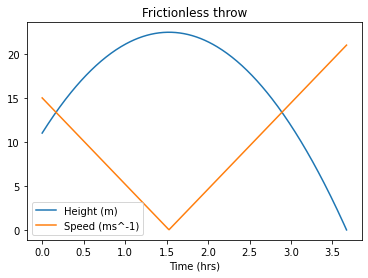

In [25]:
s_list, v_list, t_list = throw_ball(GRAVITY, INI_VEL, HEIGHT, 0.01)
pyplot.title("Frictionless throw")
pyplot.xlabel("Time (hrs)")
pyplot.plot(t_list, s_list, label="Height (m)")
pyplot.plot(t_list, v_list, label="Speed (ms^-1)")
pyplot.legend()
pyplot.show()

### Exercise 02
#### Part A

In [26]:
def calc_friction(area, velocity):
    return 0.65 * area * velocity * abs(velocity)

def throw_ball_friction(gravity, ini_vel, height, time_step, mass, radius):
    AREA = math.pi * (radius ** 2)
    WEIGHT = gravity * mass
    a = (WEIGHT - calc_friction(AREA, ini_vel)) / mass
    dv = a
    v = ini_vel
    ds = v
    s = 0
    t = 0

    s_list = []
    v_list = []
    a_list = []
    t_list = []

    s_list.append(height)
    v_list.append(abs(ini_vel))
    a_list.append(abs(a))
    t_list.append(0)

    while s < height:
        t += time_step
        v += dv * time_step
        s += ds * time_step
        a = (WEIGHT - calc_friction(AREA, v)) / mass
        t_list.append(t)
        a_list.append(abs(a))
        v_list.append(abs(v))
        s_list.append(height - s)
        dv = a
        ds = v

    return s_list, v_list, a_list, t_list

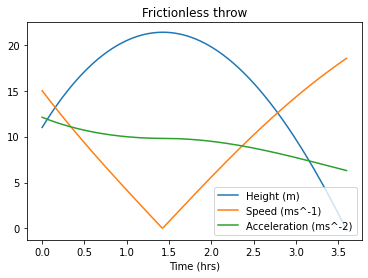

In [27]:
s_list, v_list, a_list, t_list = throw_ball_friction(GRAVITY, INI_VEL, HEIGHT, 0.01, MASS, RADIUS)
pyplot.title("Frictionless throw")
pyplot.xlabel("Time (hrs)")
pyplot.plot(t_list, s_list, label="Height (m)")
pyplot.plot(t_list, v_list, label="Speed (ms^-1)")
pyplot.plot(t_list, a_list, label="Acceleration (ms^-2)")
pyplot.legend()
pyplot.show()